       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

1. 성별에 따른 평균 소비 점수  | 2. 연 소득 구간별 평균 소비 점수 | 3. 연령대별 평균 소비 점수 | 0. 종료
성별에 따른 평균 소비 점수
Gender  Spending Score (1-100)
Female               51.526786
  Male               48.511364


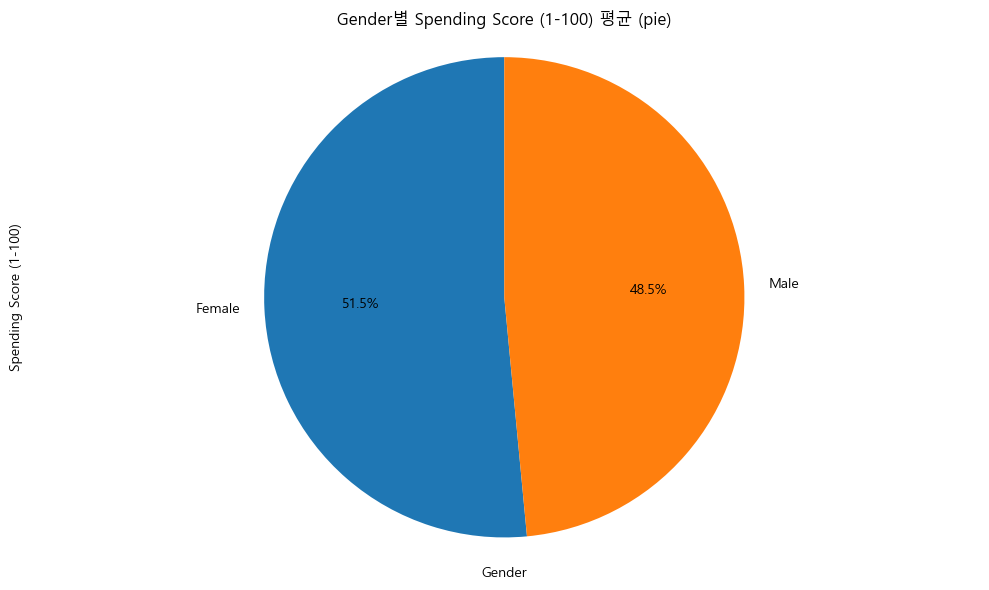


1. 성별에 따른 평균 소비 점수  | 2. 연 소득 구간별 평균 소비 점수 | 3. 연령대별 평균 소비 점수 | 0. 종료
연 소득 구간별 평균 소비 점수
IncomeGroup  Spending Score (1-100)
       0-30               49.656250
      30-60               50.196970
      60-90               49.925000
     90-120               52.277778
    120-150               50.750000


C:\Users\User\AppData\Local\Temp\ipykernel_1780\136962553.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(groupby_cols)[agg_col].agg('mean').reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_1780\136962553.py:119: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(groupby_cols)[agg_col].mean().reset_index()


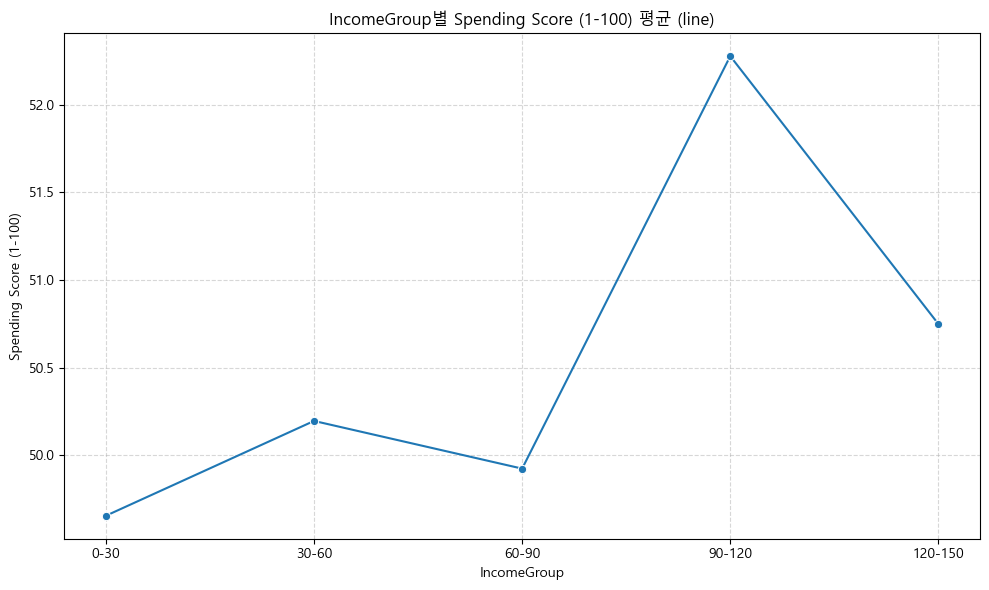


1. 성별에 따른 평균 소비 점수  | 2. 연 소득 구간별 평균 소비 점수 | 3. 연령대별 평균 소비 점수 | 0. 종료
연령대별 평균 소비 점수
AgeGroup  Spending Score (1-100)
     10대               44.647059
     20대               67.222222
     30대               57.500000
     40대               34.394737
     50대               32.521739
    60대+               44.176471


C:\Users\User\AppData\Local\Temp\ipykernel_1780\136962553.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(groupby_cols)[agg_col].agg('mean').reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_1780\136962553.py:119: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby(groupby_cols)[agg_col].mean().reset_index()


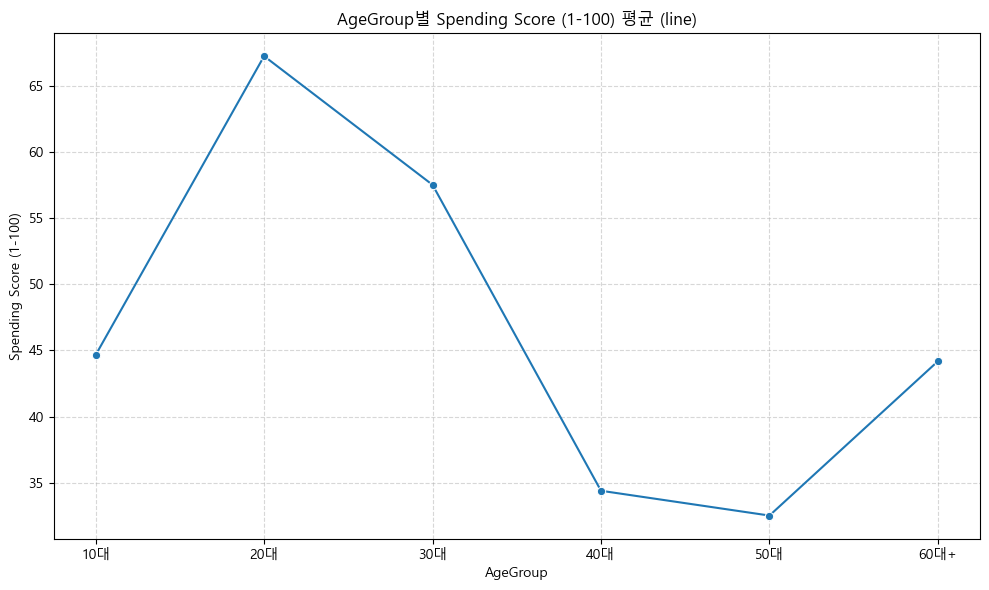


1. 성별에 따른 평균 소비 점수  | 2. 연 소득 구간별 평균 소비 점수 | 3. 연령대별 평균 소비 점수 | 0. 종료
프로그램을 종료합니다.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



############### Env ###############
# 환경변수 설정
class Env:
    def __init__(self):
        self.fontFamily = 'Malgun Gothic'       # Font Family 설정
        self.dataPath = './data/'               # 데이터 파일 경로
        self.dataName = 'Mall_Customers.csv'    # 데이터 파일 이름



class CustomerController:
    # 생성자
    def __init__(self):
        self.pltService = PltService()
        self.menu = {
        '1': lambda: self.pltService.processEda1(),
        '2': lambda: self.pltService.processEda2(),
        '3': lambda: self.pltService.processEda3()
    }

    def handler(self):
        while True:
            print('\n1. 성별에 따른 평균 소비 점수  | 2. 연 소득 구간별 평균 소비 점수 | 3. 연령대별 평균 소비 점수 | 0. 종료')
            choice = input('선택: ')
            if choice == '0':
                print('프로그램을 종료합니다.')
                break
            action = self.menu.get(choice)
            if action:
                action()
            else:
                print('잘못된 선택입니다.')



############### PltService ###############
# 데이터 처리 클래스
class PltService:
    # 생성자
    def __init__(self):
        self.csvService = CsvService()
        self.output = CustomerOutput()
        dto = self.csvService.getCsvDataDto()
        self.entity = dto.toEntity()
        
    def processEda1(self):
        print("성별에 따른 평균 소비 점수")
        self.output.showTable(self.entity.df, 'Gender', 'Spending Score (1-100)')
        self.output.showChart(self.entity.df, 'Gender', 'Spending Score (1-100)', kind='pie')

    def processEda2(self):
        print("연 소득 구간별 평균 소비 점수")
        bins = [0, 30, 60, 90, 120, 150]
        labels = ['0-30', '30-60', '60-90', '90-120', '120-150']
        self.entity.df['IncomeGroup'] = pd.cut(self.entity.df['Annual Income (k$)'], bins=bins, labels=labels)
        self.output.showTable(self.entity.df, 'IncomeGroup', 'Spending Score (1-100)')
        self.output.showChart(self.entity.df, 'IncomeGroup', 'Spending Score (1-100)', kind='line')
    
    def processEda3(self):
        print("연령대별 평균 소비 점수")
        bins = [0, 20, 30, 40, 50, 60, 100]
        labels = ['10대', '20대', '30대', '40대', '50대', '60대+']
        self.entity.df['AgeGroup'] = pd.cut(self.entity.df['Age'], bins=bins, labels=labels)
        self.output.showTable(self.entity.df, 'AgeGroup', 'Spending Score (1-100)')
        self.output.showChart(self.entity.df, 'AgeGroup', 'Spending Score (1-100)', kind='line')



############### CsvService ###############
# CSV 로딩 클래스
class CsvService:
    def __init__(self):
        self.env = Env()
        self.csvData = pd.read_csv(self.env.dataPath + self.env.dataName, encoding='cp949', low_memory=False)

    def getCsvDataDto(self):
        return CsvDataDto(self.csvData)



############### CsvDataDto ###############
# 계층 간 전달 DTO 클래스
class CsvDataDto:
    def __init__(self, csvData):
        self.csvData = csvData

    def toEntity(self):
        return Customer(self.csvData)
    


############### Customer ###############
# Customer 도메인 클래스 (Data Frame)
class Customer:
    # 생성자
    def __init__(self, csvDataDto):
        self.df = pd.DataFrame(csvDataDto)
        print(self.df.describe())



############### CustomerOutput ###############
# 사용자 요청 출력 처리
class CustomerOutput:
    def __init__(self):
        self.env = Env()
    
    def showTable(self, df, groupby_cols, agg_col):
        result = df.groupby(groupby_cols)[agg_col].agg('mean').reset_index()
        print(result.to_string(index=False))

    # 시각화 실행 메서드
    def showChart(self, df, groupby_cols, agg_col, kind='bar'):
        plt.rcParams['font.family'] = self.env.fontFamily
        result = df.groupby(groupby_cols)[agg_col].mean().reset_index()

        plt.figure(figsize=(10, 6))

        if kind == 'bar':
            sns.barplot(x=groupby_cols, y=agg_col, data=result)
        elif kind == 'pie':
            plt.pie(result[agg_col], labels=result[groupby_cols], autopct='%1.1f%%', startangle=90)
            plt.axis('equal')
        elif kind == 'line':
            sns.lineplot(x=groupby_cols, y=agg_col, data=result, marker='o')
        else:
            raise ValueError(f"지원하지 않는 그래프 종류입니다: {kind}")

        plt.title(f"{groupby_cols}별 {agg_col} 평균 ({kind})")
        plt.xlabel(groupby_cols)
        plt.ylabel(agg_col)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()



############### Applcation Main ###############
def main():
    customerController = CustomerController()
    customerController.handler()

main()